In [1]:
# Load various imports
import numpy as np
import pandas as pd
import os
import librosa
import ast

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt
import seaborn as sn

from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam

import joblib

Using TensorFlow backend.


### Função para extrair MFCCs de um ficheiro de áudio:

In [2]:
new_featuresdf = pd.read_csv("40MFCCs.csv", sep="|")

In [3]:
def convert_to_list(row):
    return ast.literal_eval(row.feature)
new_featuresdf['feature'] = new_featuresdf.apply(convert_to_list, axis=1)

In [4]:
# Convert features and corresponding classification labels into numpy arrays
X = np.array(new_featuresdf.feature.tolist())
y = np.array(new_featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) #Transforms class labels into binary vectores with 1 on the respective class

In [5]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

# Logistic Regression

Dá para fazer logistic regression com CV já incorporada, pesquisar no sklearn

In [54]:
lr = LogisticRegression(multi_class='ovr',max_iter=550)

O seguinte passo basicamente retorna um vetor com os índices das labels de cada sample <br>
np.argmax returnes the indices of the highest values

In [55]:
y_train_one_column = []
for one_hot_array in y_train:
    y_train_one_column.append(str(np.argmax(one_hot_array)))
y_train_one_column = np.array(y_train_one_column)
y_test_one_column = []
for one_hot_array in y_test:
    y_test_one_column.append(str(np.argmax(one_hot_array)))
y_test_one_column = np.array(y_test_one_column)

In [56]:
lr.fit(x_train, y_train_one_column)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=550,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
lr.score(x_test, y_test_one_column)

0.5758443045220378

In [58]:
lr_predictions = lr.predict(x_test)

Text(68.09375, 0.5, 'Truth')

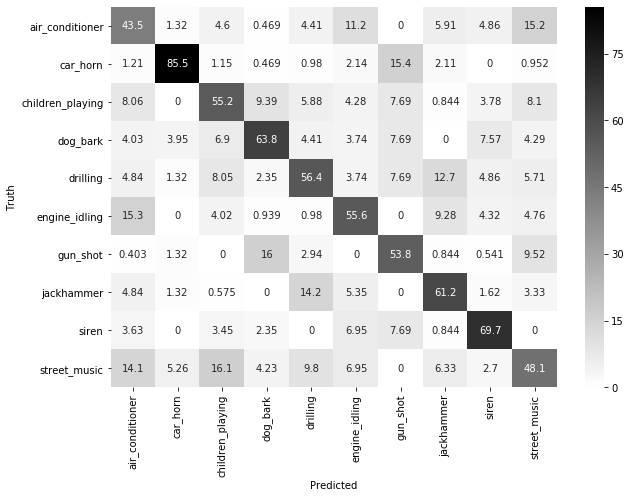

In [59]:
labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music']

cm = confusion_matrix(y_test_one_column, lr_predictions, normalize='pred')*100

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt='.3g', cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

Pôr normalize='pred' é basicamente dizer que se quer obter a precisão.

In [60]:
print(metrics.classification_report(y_test_one_column, lr_predictions, digits=3,zero_division=0))

              precision    recall  f1-score   support

           0      0.435     0.532     0.479       203
           1      0.855     0.756     0.802        86
           2      0.552     0.525     0.538       183
           3      0.638     0.677     0.657       201
           4      0.564     0.558     0.561       206
           5      0.556     0.539     0.547       193
           6      0.538     0.097     0.165        72
           7      0.612     0.697     0.652       208
           8      0.697     0.782     0.737       165
           9      0.481     0.439     0.459       230

    accuracy                          0.576      1747
   macro avg      0.593     0.560     0.560      1747
weighted avg      0.576     0.576     0.568      1747



# Support Vector Machine

In [13]:
# training a linear SVM classifier 
svm = SVC(C = 1).fit(x_train, y_train_one_column) 
svm_predictions = svm.predict(x_test) 
  
# model accuracy for X_test   
accuracy = svm.score(x_test, y_test_one_column) 
print (accuracy) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test_one_column, svm_predictions)

0.6153405838580424


Text(68.09375, 0.5, 'Truth')

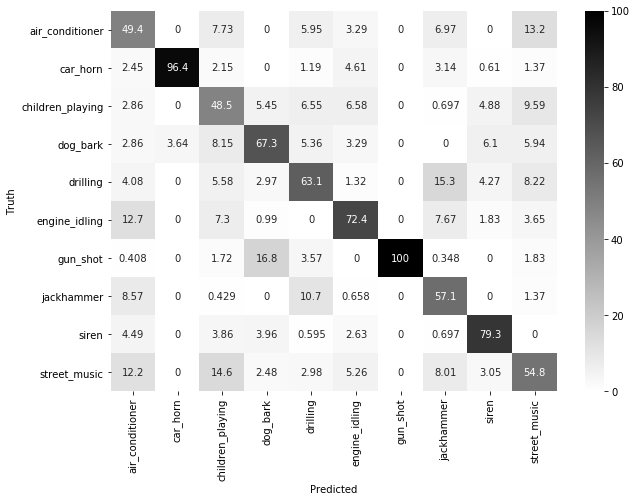

In [14]:
cm = confusion_matrix(y_test_one_column, svm_predictions, normalize='pred')*100

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt='.3g', cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [15]:
print(metrics.classification_report(y_test_one_column, svm_predictions, digits=3))

              precision    recall  f1-score   support

           0      0.494     0.596     0.540       203
           1      0.964     0.616     0.752        86
           2      0.485     0.617     0.543       183
           3      0.673     0.677     0.675       201
           4      0.631     0.515     0.567       206
           5      0.724     0.570     0.638       193
           6      1.000     0.306     0.468        72
           7      0.571     0.788     0.663       208
           8      0.793     0.788     0.790       165
           9      0.548     0.522     0.535       230

    accuracy                          0.615      1747
   macro avg      0.688     0.599     0.617      1747
weighted avg      0.644     0.615     0.615      1747



# Random Forest

* number of decision trees used (n_estimators): 20
* criterion (gini  or entropy): gini
* seed used by the random state generator for randomizing the dataset (random_state): 42

In [16]:
# training a Random Forest classifier
rf = RandomForestClassifier(n_estimators=20, random_state=42)
rf.fit(x_train, y_train_one_column)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [17]:
rf.score(x_test, y_test_one_column)

0.8580423583285632

In [18]:
rf_predictions = rf.predict(x_test)

Text(68.09375, 0.5, 'Truth')

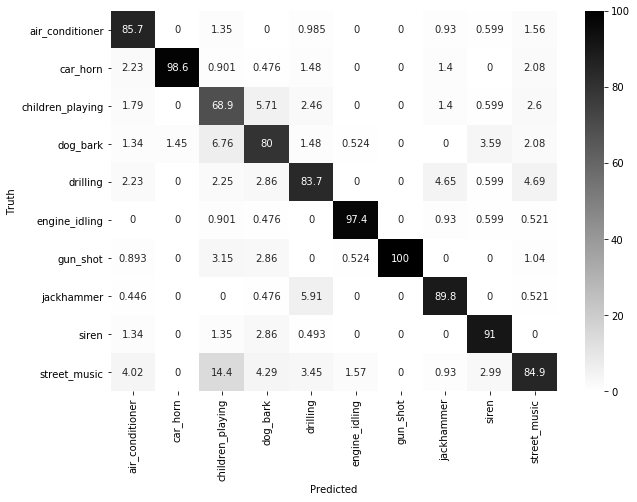

In [19]:
cm = confusion_matrix(y_test_one_column, rf_predictions, normalize='pred')*100

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt='.3g', cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
print(metrics.classification_report(y_test_one_column, rf_predictions, digits=3))

              precision    recall  f1-score   support

           0      0.857     0.946     0.899       203
           1      0.986     0.791     0.877        86
           2      0.689     0.836     0.756       183
           3      0.800     0.836     0.818       201
           4      0.837     0.825     0.831       206
           5      0.974     0.964     0.969       193
           6      1.000     0.750     0.857        72
           7      0.898     0.928     0.913       208
           8      0.910     0.921     0.916       165
           9      0.849     0.709     0.773       230

    accuracy                          0.858      1747
   macro avg      0.880     0.851     0.861      1747
weighted avg      0.865     0.858     0.858      1747



# k Nearest Neighbors

In [21]:
# training a KNN classifier 
knn = KNeighborsClassifier(n_neighbors = 1).fit(x_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(x_test, y_test) 
print (accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(x_test)
y_predicted_one_column = list()
for one_hot_array in knn_predictions:
    y_predicted_one_column.append(str(np.argmax(one_hot_array)))
y_predicted_one_column = np.array(y_predicted_one_column)

cm = confusion_matrix(y_test_one_column, y_predicted_one_column, normalize='pred')*100

0.9004006868918145


Text(68.09375, 0.5, 'Truth')

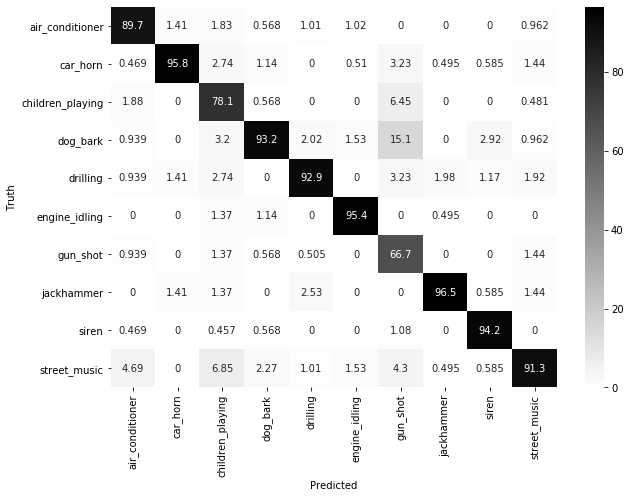

In [22]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt='.3g', cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
print(metrics.classification_report(y_test_one_column, y_predicted_one_column, digits=3))

              precision    recall  f1-score   support

           0      0.897     0.941     0.918       203
           1      0.958     0.791     0.866        86
           2      0.781     0.934     0.851       183
           3      0.932     0.816     0.870       201
           4      0.929     0.893     0.911       206
           5      0.954     0.969     0.961       193
           6      0.667     0.861     0.752        72
           7      0.965     0.938     0.951       208
           8      0.942     0.976     0.958       165
           9      0.913     0.826     0.868       230

    accuracy                          0.900      1747
   macro avg      0.894     0.894     0.891      1747
weighted avg      0.907     0.900     0.901      1747



# Feed-forward Neural Network

In [24]:
num_labels = y_train.shape[1]

N=1

fnn = Sequential()

fnn.add(Dense(1024, input_shape=(40,)))
fnn.add(Activation('sigmoid'))
fnn.add(Dropout(0.5))

for i in range(N-1):
    fnn.add(Dense(1024))
    fnn.add(Activation('sigmoid'))
    fnn.add(Dropout(0.5))

fnn.add(Dense(num_labels))
fnn.add(Activation('softmax'))

fnn.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
fnn.fit(x_train, y_train, batch_size=32, epochs=1000)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1000





6985/6985 [==============================] - 1s 131us/step - loss: 1.6870 - acc: 0.4278
Epoch 2/1000
6985/6985 [==============================] - 0s 71us/step - loss: 1.2222 - acc: 0.5884
Epoch 3/1000
6985/6985 [==============================] - 1s 79us/step - loss: 1.0750 - acc: 0.6388
Epoch 4/1000
6985/6985 [==============================] - 1s 77us/step - loss: 0.9721 - acc: 0.6789
Epoch 5/1000
6985/6985 [==============================] - 0s 67us/step - loss: 0.8938 - acc: 0.7014
Epoch 6/1000
6985/6985 [==============================] - 1s 76us/step - loss: 0.8139 - acc: 0.7274
Epoch 7/1000
6985/6985 [==============================] - 1s 83us/step - loss: 0.7685 - acc: 0.7449
Epoch 8/1000
6985/6985 [==============================] - 1s 83us/step - los

6985/6985 [==============================] - 0s 65us/step - loss: 0.1428 - acc: 0.9542
Epoch 129/1000
6985/6985 [==============================] - 0s 64us/step - loss: 0.1552 - acc: 0.9480
Epoch 130/1000
6985/6985 [==============================] - 0s 64us/step - loss: 0.1637 - acc: 0.9422
Epoch 131/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.1584 - acc: 0.9477
Epoch 132/1000
6985/6985 [==============================] - 1s 75us/step - loss: 0.1477 - acc: 0.9489
Epoch 133/1000
6985/6985 [==============================] - 0s 64us/step - loss: 0.1430 - acc: 0.9528
Epoch 134/1000
6985/6985 [==============================] - 0s 70us/step - loss: 0.1399 - acc: 0.9536
Epoch 135/1000
6985/6985 [==============================] - 1s 72us/step - loss: 0.1344 - acc: 0.9552
Epoch 136/1000
6985/6985 [==============================] - 0s 64us/step - loss: 0.1431 - acc: 0.9508
Epoch 137/1000
6985/6985 [==============================] - 0s 66us/step - loss: 0.1581 - acc: 0.

Epoch 208/1000
6985/6985 [==============================] - 0s 64us/step - loss: 0.1245 - acc: 0.9578
Epoch 209/1000
6985/6985 [==============================] - 0s 64us/step - loss: 0.1255 - acc: 0.9558
Epoch 210/1000
6985/6985 [==============================] - 0s 64us/step - loss: 0.1128 - acc: 0.9611
Epoch 211/1000
6985/6985 [==============================] - 0s 64us/step - loss: 0.1314 - acc: 0.9560
Epoch 212/1000
6985/6985 [==============================] - 0s 64us/step - loss: 0.1102 - acc: 0.9583
Epoch 213/1000
6985/6985 [==============================] - 1s 116us/step - loss: 0.1245 - acc: 0.9583 0s - loss: 0.1145 - acc:
Epoch 214/1000
6985/6985 [==============================] - 0s 64us/step - loss: 0.1170 - acc: 0.9608
Epoch 215/1000
6985/6985 [==============================] - 0s 64us/step - loss: 0.1160 - acc: 0.9611
Epoch 216/1000
6985/6985 [==============================] - 0s 65us/step - loss: 0.1150 - acc: 0.9586
Epoch 217/1000
6985/6985 [==============================

6985/6985 [==============================] - 0s 71us/step - loss: 0.1019 - acc: 0.9654
Epoch 289/1000
6985/6985 [==============================] - 0s 71us/step - loss: 0.0951 - acc: 0.9676
Epoch 290/1000
6985/6985 [==============================] - 0s 70us/step - loss: 0.1085 - acc: 0.9644
Epoch 291/1000
6985/6985 [==============================] - 0s 70us/step - loss: 0.1071 - acc: 0.9621
Epoch 292/1000
6985/6985 [==============================] - 0s 70us/step - loss: 0.0957 - acc: 0.9659
Epoch 293/1000
6985/6985 [==============================] - 0s 71us/step - loss: 0.0926 - acc: 0.9684
Epoch 294/1000
6985/6985 [==============================] - 1s 79us/step - loss: 0.1116 - acc: 0.9622
Epoch 295/1000
6985/6985 [==============================] - 0s 72us/step - loss: 0.1092 - acc: 0.9649
Epoch 296/1000
6985/6985 [==============================] - 1s 72us/step - loss: 0.1008 - acc: 0.9651
Epoch 297/1000
6985/6985 [==============================] - 1s 72us/step - loss: 0.1033 - acc: 0.

6985/6985 [==============================] - 0s 70us/step - loss: 0.0836 - acc: 0.9744
Epoch 449/1000
6985/6985 [==============================] - 0s 64us/step - loss: 0.0959 - acc: 0.9661
Epoch 450/1000
6985/6985 [==============================] - 0s 66us/step - loss: 0.0862 - acc: 0.9695
Epoch 451/1000
6985/6985 [==============================] - 0s 66us/step - loss: 0.0871 - acc: 0.9715
Epoch 452/1000
6985/6985 [==============================] - 0s 62us/step - loss: 0.0803 - acc: 0.9711
Epoch 453/1000
6985/6985 [==============================] - 0s 70us/step - loss: 0.0881 - acc: 0.9694
Epoch 454/1000
6985/6985 [==============================] - 0s 65us/step - loss: 0.0912 - acc: 0.9704
Epoch 455/1000
6985/6985 [==============================] - 0s 67us/step - loss: 0.0807 - acc: 0.9715
Epoch 456/1000
6985/6985 [==============================] - 0s 70us/step - loss: 0.0749 - acc: 0.9737
Epoch 457/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.0721 - acc: 0.

6985/6985 [==============================] - 1s 90us/step - loss: 0.0920 - acc: 0.9707
Epoch 529/1000
6985/6985 [==============================] - 0s 67us/step - loss: 0.0811 - acc: 0.9725
Epoch 530/1000
6985/6985 [==============================] - 0s 66us/step - loss: 0.0821 - acc: 0.9724
Epoch 531/1000
6985/6985 [==============================] - 0s 66us/step - loss: 0.0771 - acc: 0.9768
Epoch 532/1000
6985/6985 [==============================] - 0s 66us/step - loss: 0.0829 - acc: 0.9755
Epoch 533/1000
6985/6985 [==============================] - 1s 86us/step - loss: 0.0688 - acc: 0.9772
Epoch 534/1000
6985/6985 [==============================] - 0s 70us/step - loss: 0.0741 - acc: 0.9728
Epoch 535/1000
6985/6985 [==============================] - 0s 68us/step - loss: 0.0811 - acc: 0.9722
Epoch 536/1000
6985/6985 [==============================] - 2s 232us/step - loss: 0.0925 - acc: 0.9689
Epoch 537/1000
6985/6985 [==============================] - 0s 65us/step - loss: 0.0788 - acc: 0

6985/6985 [==============================] - 0s 65us/step - loss: 0.0731 - acc: 0.9762
Epoch 608/1000
6985/6985 [==============================] - 0s 67us/step - loss: 0.0783 - acc: 0.9757
Epoch 609/1000
6985/6985 [==============================] - 0s 66us/step - loss: 0.0645 - acc: 0.9794
Epoch 610/1000
6985/6985 [==============================] - 0s 66us/step - loss: 0.0698 - acc: 0.9767
Epoch 611/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.0810 - acc: 0.9735
Epoch 612/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.0734 - acc: 0.9742
Epoch 613/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.0830 - acc: 0.9731
Epoch 614/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.0668 - acc: 0.9770
Epoch 615/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.0713 - acc: 0.9761
Epoch 616/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.0786 - acc: 0.

Epoch 687/1000
6985/6985 [==============================] - 1s 78us/step - loss: 0.0765 - acc: 0.9754
Epoch 688/1000
6985/6985 [==============================] - 0s 65us/step - loss: 0.0750 - acc: 0.9742
Epoch 689/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.0853 - acc: 0.9731
Epoch 690/1000
6985/6985 [==============================] - 1s 76us/step - loss: 0.0734 - acc: 0.9768
Epoch 691/1000
6985/6985 [==============================] - 0s 64us/step - loss: 0.0780 - acc: 0.9739
Epoch 692/1000
6985/6985 [==============================] - 0s 69us/step - loss: 0.0710 - acc: 0.9748
Epoch 693/1000
6985/6985 [==============================] - 0s 65us/step - loss: 0.0751 - acc: 0.9754
Epoch 694/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.0759 - acc: 0.9751
Epoch 695/1000
6985/6985 [==============================] - 0s 68us/step - loss: 0.0615 - acc: 0.9785
Epoch 696/1000
6985/6985 [==============================] - 1s 74us/step - loss: 0

Epoch 767/1000
6985/6985 [==============================] - 0s 65us/step - loss: 0.0653 - acc: 0.9805
Epoch 768/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.0645 - acc: 0.9790
Epoch 769/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.0704 - acc: 0.9767
Epoch 770/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.0616 - acc: 0.9782
Epoch 771/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.0625 - acc: 0.9781
Epoch 772/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.0684 - acc: 0.9797
Epoch 773/1000
6985/6985 [==============================] - 0s 64us/step - loss: 0.0675 - acc: 0.9785
Epoch 774/1000
6985/6985 [==============================] - 0s 64us/step - loss: 0.0659 - acc: 0.9781
Epoch 775/1000
6985/6985 [==============================] - 0s 64us/step - loss: 0.0761 - acc: 0.9752
Epoch 776/1000
6985/6985 [==============================] - 0s 68us/step - loss: 0

Epoch 847/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.0679 - acc: 0.9768
Epoch 848/1000
6985/6985 [==============================] - 1s 76us/step - loss: 0.0591 - acc: 0.9802
Epoch 849/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.0697 - acc: 0.9781
Epoch 850/1000
6985/6985 [==============================] - 0s 66us/step - loss: 0.0636 - acc: 0.9805
Epoch 851/1000
6985/6985 [==============================] - 0s 64us/step - loss: 0.0615 - acc: 0.9810
Epoch 852/1000
6985/6985 [==============================] - 0s 65us/step - loss: 0.0630 - acc: 0.9787
Epoch 853/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.0612 - acc: 0.9791
Epoch 854/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.0645 - acc: 0.9788
Epoch 855/1000
6985/6985 [==============================] - 0s 64us/step - loss: 0.0550 - acc: 0.9827
Epoch 856/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0

6985/6985 [==============================] - 0s 63us/step - loss: 0.0530 - acc: 0.9827
Epoch 928/1000
6985/6985 [==============================] - 0s 62us/step - loss: 0.0600 - acc: 0.9804
Epoch 929/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.0656 - acc: 0.9774
Epoch 930/1000
6985/6985 [==============================] - 0s 62us/step - loss: 0.0580 - acc: 0.9798
Epoch 931/1000
6985/6985 [==============================] - 0s 62us/step - loss: 0.0564 - acc: 0.9801
Epoch 932/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.0603 - acc: 0.9821
Epoch 933/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.0718 - acc: 0.9777: 0s - loss: 0.0861 - acc: 
Epoch 934/1000
6985/6985 [==============================] - 0s 64us/step - loss: 0.0570 - acc: 0.9834
Epoch 935/1000
6985/6985 [==============================] - 0s 65us/step - loss: 0.0692 - acc: 0.9771
Epoch 936/1000
6985/6985 [==============================] - 0s 63us/st

In [25]:
fnn_predictions = fnn.predict(x_test)

In [26]:
new_fnn_predictions=list()
for i in fnn_predictions:
    maximum = max(i)
    new_list = [int(element==maximum) for element in i]
    new_fnn_predictions.append(new_list)
fnn_predictions_one_column = list()
for one_hot_array in new_fnn_predictions:
    fnn_predictions_one_column.append(str(np.argmax(one_hot_array)))
fnn_predictions_one_column = np.array(fnn_predictions_one_column)

Text(68.09375, 0.5, 'Truth')

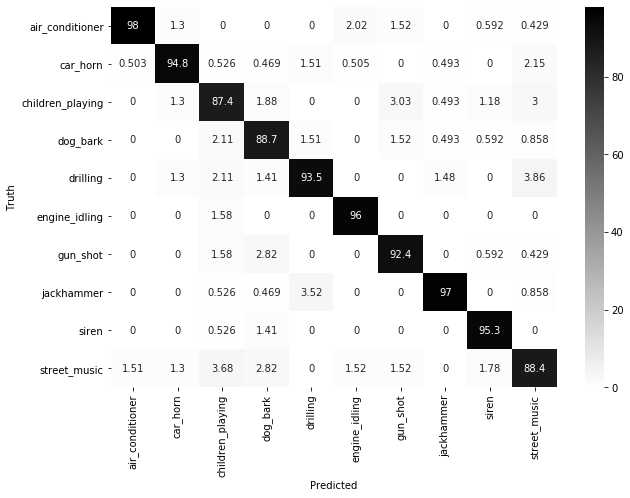

In [27]:
cm = confusion_matrix(y_test_one_column, fnn_predictions_one_column, normalize='pred')*100

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt='.3g', cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
print(metrics.classification_report(y_test_one_column, fnn_predictions_one_column, digits=3))

              precision    recall  f1-score   support

           0      0.980     0.961     0.970       203
           1      0.948     0.849     0.896        86
           2      0.874     0.907     0.890       183
           3      0.887     0.940     0.913       201
           4      0.935     0.903     0.919       206
           5      0.960     0.984     0.972       193
           6      0.924     0.847     0.884        72
           7      0.970     0.947     0.959       208
           8      0.953     0.976     0.964       165
           9      0.884     0.896     0.890       230

    accuracy                          0.930      1747
   macro avg      0.931     0.921     0.926      1747
weighted avg      0.930     0.930     0.930      1747



## Guardar modelos treinados

ver se guardou bem subtraindo a previsão feita aqui pela do modelo loaded

In [29]:
joblib.dump(lr, 'lr40.pkl')

['lr40.pkl']

In [30]:
loadedlr=joblib.load('lr40.pkl')

loadedlrpredictions=loadedlr.predict(x_test)

print('Are the 2 predicted arrays the same?:', np.array_equal(loadedlrpredictions, lr_predictions))

Are the 2 predicted arrays the same?: True


In [31]:
joblib.dump(svm, 'svm40.pkl')

['svm40.pkl']

In [32]:
loadedsvm=joblib.load('svm40.pkl')

loadedsvmpredictions=loadedsvm.predict(x_test)

print('Are the 2 predicted arrays the same?:', np.array_equal(loadedsvmpredictions, svm_predictions))

Are the 2 predicted arrays the same?: True


In [33]:
joblib.dump(rf, 'rf40.pkl')

['rf40.pkl']

In [34]:
loadedrf=joblib.load('rf40.pkl')

loadedrfpredictions=loadedrf.predict(x_test)

print('Are the 2 predicted arrays the same?:', np.array_equal(loadedrfpredictions, rf_predictions))

Are the 2 predicted arrays the same?: True


In [35]:
joblib.dump(knn, 'knn40.pkl')

['knn40.pkl']

In [36]:
loadedknn=joblib.load('knn40.pkl')

loadedknnpredictions=loadedknn.predict(x_test)

print('Are the 2 predicted arrays the same?:', np.array_equal(loadedknnpredictions, knn_predictions))

Are the 2 predicted arrays the same?: True


In [37]:
joblib.dump(fnn, 'fnn40.pkl')

['fnn40.pkl']

In [38]:
loadedfnn=joblib.load('fnn40.pkl')

loadedfnnpredictions=loadedfnn.predict(x_test)

print('Are the 2 predicted arrays the same?:', np.array_equal(loadedfnnpredictions, fnn_predictions))

Are the 2 predicted arrays the same?: True
